# Speech Emotion recognition.
Using CNN1D to classify emotion in speech
Using RAVDESS sudio only and SAVEE

In [1]:
import os
import sys

#Main python library to work with audio files
import librosa
import librosa.display

import pandas as pd
import numpy as np
#Some important keras functionalities to be used in the code to create the model
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
#Seaborn to visualize the data
import seaborn as sns
import matplotlib.pyplot as plt
# Ipython we will be using to play with the audio files
from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

print ("executed successfully")

executed successfully


In [2]:
print(os.getcwd())
#save dataset file name as below 
file_name = "Audio_Speech_Actors_01-24"
file_nameS = "ALL"
#save path of dataset in to a variable
Ravdess = os.path.join(os.getcwd(),file_name)
Savee = os.path.join(os.getcwd(),file_nameS)

print(Ravdess)
print(Savee)

C:\Users\Jagjeet\AppML
C:\Users\Jagjeet\AppML\Audio_Speech_Actors_01-24
C:\Users\Jagjeet\AppML\ALL


In [3]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + '/'+ dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + '/' + dir + '/' + file)
        
# Data frame created for emotion files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Path files data frame
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  neutral  C:\Users\Jagjeet\AppML\Audio_Speech_Actors_01-...
1  neutral  C:\Users\Jagjeet\AppML\Audio_Speech_Actors_01-...
2  neutral  C:\Users\Jagjeet\AppML\Audio_Speech_Actors_01-...
3  neutral  C:\Users\Jagjeet\AppML\Audio_Speech_Actors_01-...
4     calm  C:\Users\Jagjeet\AppML\Audio_Speech_Actors_01-...

In [21]:
# Work with our second dataset
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + '/' + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# Emotions files SAVEE data frame
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Path files SAVEE data frame
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                   Path
0    angry  C:\Users\Jagjeet\AppML\ALL/DC_a01.wav
1    angry  C:\Users\Jagjeet\AppML\ALL/DC_a02.wav
2    angry  C:\Users\Jagjeet\AppML\ALL/DC_a03.wav
3    angry  C:\Users\Jagjeet\AppML\ALL/DC_a04.wav
4    angry  C:\Users\Jagjeet\AppML\ALL/DC_a05.wav

In [22]:
# Combine both datasets in to one
data_path = pd.concat([Ravdess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0  neutral  C:\Users\Jagjeet\AppML\Audio_Speech_Actors_01-...
1  neutral  C:\Users\Jagjeet\AppML\Audio_Speech_Actors_01-...
2  neutral  C:\Users\Jagjeet\AppML\Audio_Speech_Actors_01-...
3  neutral  C:\Users\Jagjeet\AppML\Audio_Speech_Actors_01-...
4     calm  C:\Users\Jagjeet\AppML\Audio_Speech_Actors_01-...

In [23]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

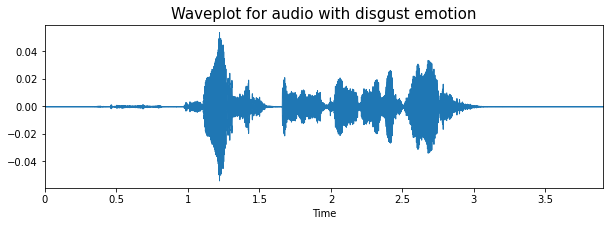

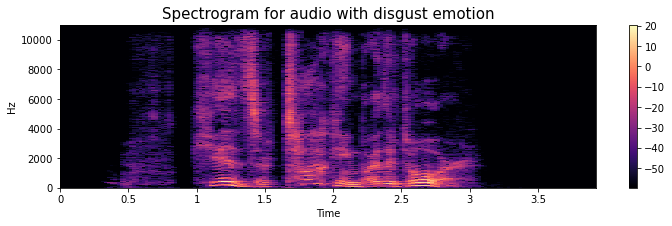

In [24]:
emotion='disgust'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

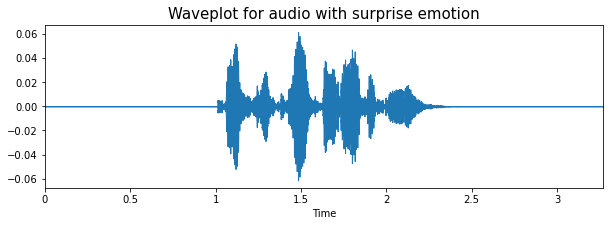

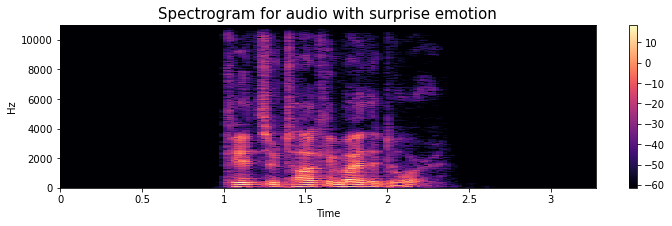

In [25]:
emotion='surprise'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

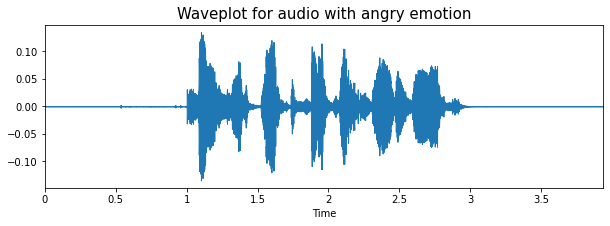

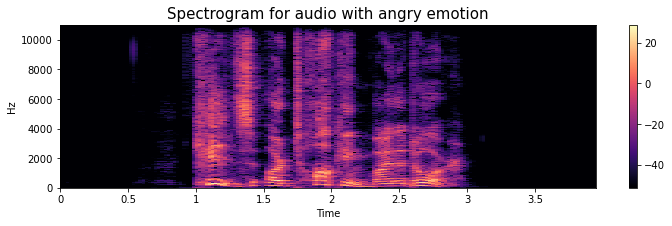

In [26]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

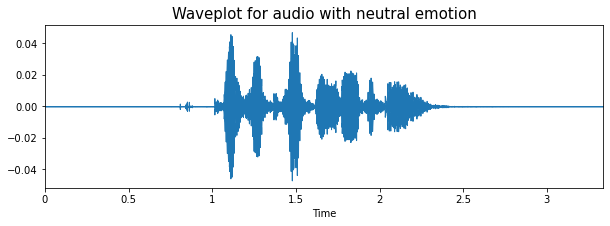

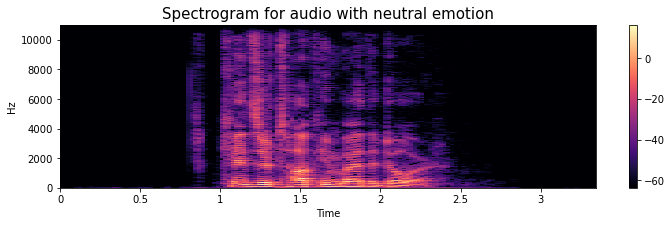

In [27]:
emotion='neutral'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

Data augmentation

In [28]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

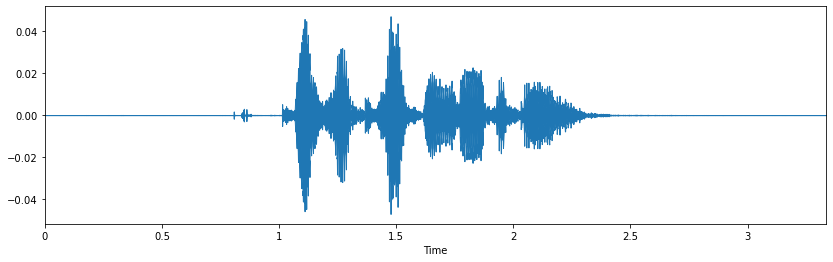

In [29]:
#Normal view
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

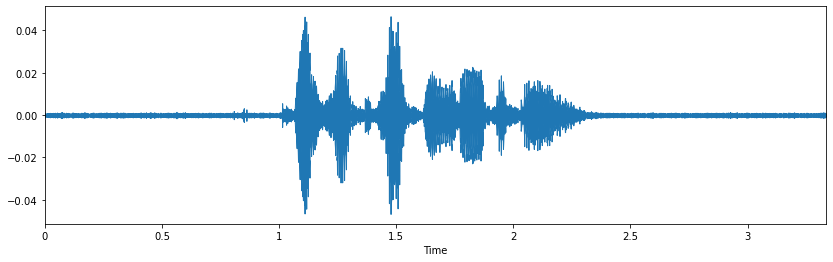

In [30]:
#Add noise in the data
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

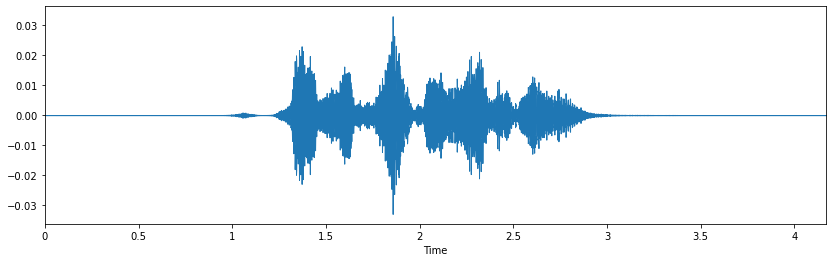

In [31]:
#apply stretching
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

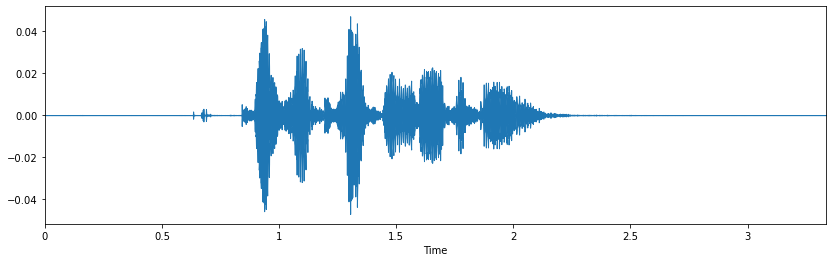

In [32]:
#shift apply
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

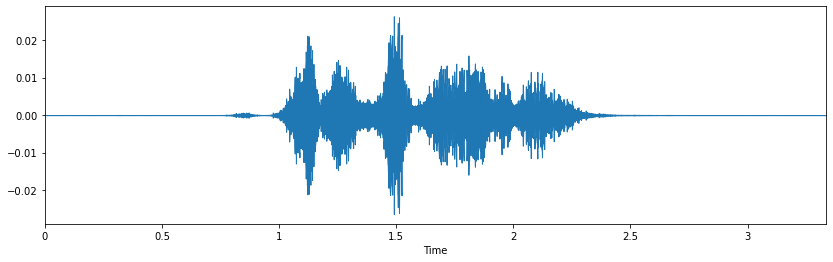

In [33]:
#Pitching
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [34]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr))
    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))
    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))
    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))
    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))    
    return result

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    res1 = extract_features(data)
    result = np.array(res1)
    
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))
    
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

print("executed successfully")

executed successfully


In [35]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)
print("Executed")

Executed


In [36]:
len(X), len(Y), data_path.Path.shape

(5760, 5760, (1920,))

In [37]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.300781  0.706492  0.756853  0.735217  0.731014  0.715156  0.667529   
1  0.282638  0.740304  0.805723  0.777758  0.771738  0.785695  0.712916   
2  0.176693  0.640605  0.712837  0.743736  0.714797  0.701402  0.694569   
3  0.271272  0.674966  0.723259  0.724594  0.681302  0.670643  0.674574   
4  0.274835  0.736732  0.773269  0.748364  0.736871  0.747536  0.681006   

          7         8         9  ...           153       154       155  \
0  0.673754  0.722173  0.748969  ...  4.319263e-06  0.000003  0.000002   
1  0.663456  0.703597  0.744708  ...  8.065248e-06  0.000007  0.000006   
2  0.663853  0.688527  0.742508  ...  7.999367e-07  0.000001  0.000001   
3  0.630036  0.680146  0.708276  ...  6.998011e-06  0.000007  0.000007   
4  0.641382  0.691491  0.722140  ...  9.600288e-06  0.000010  0.000010   

            156           157           158       159           160  \
0  2.286677e-06  5.131693e-06  8.065748e-06  0.000005  2.270858e-06   
1  5.903715e-06  8.729976e-06  1.174774e-05  0.000009  5.812880e-06   
2  5.350822e-07  3.480663e-07  8.398366e-07  0.000001  4.287777e-07   
3  6.999257e-06  1.217880e-05  9.449916e-06  0.000008  2.638513e-06   
4  9.818085e-06  1.539587e-05  1.254606e-05  0.000011  5.721998e-06   

            161   labels  
0  1.642365e-07  neutral  
1  3.562812e-06  neutral  
2  2.878995e-08  neutral  
3  1.788902e-07  neutral  
4  3.124034e-06  neutral  

[5 rows x 163 columns]

In [38]:
#Data Preperation-
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [39]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [40]:
# splitting data in to Train and Test
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4320, 162), (4320, 8), (1440, 162), (1440, 8))

In [41]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4320, 162), (4320, 8), (1440, 162), (1440, 8))

In [42]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4320, 162, 1), (4320, 8), (1440, 162, 1), (1440, 8))

# Create Model now

In [43]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 81, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 81, 256)           327936    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 41, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 41, 128)           163968    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 21, 128)           0

In [44]:
learning_Reduce = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[learning_Reduce])

Epoch 1/50
68/68 [==============================] - 32s 467ms/step - loss: 2.0119 - accuracy: 0.1877 - val_loss: 1.9439 - val_accuracy: 0.2424
Epoch 2/50
68/68 [==============================] - 33s 479ms/step - loss: 1.9320 - accuracy: 0.2282 - val_loss: 1.8868 - val_accuracy: 0.2410
Epoch 3/50
68/68 [==============================] - 30s 446ms/step - loss: 1.8664 - accuracy: 0.2581 - val_loss: 1.8534 - val_accuracy: 0.2889
Epoch 4/50
68/68 [==============================] - 28s 407ms/step - loss: 1.8382 - accuracy: 0.2789 - val_loss: 1.7513 - val_accuracy: 0.3590
Epoch 5/50
68/68 [==============================] - 28s 414ms/step - loss: 1.7699 - accuracy: 0.3009 - val_loss: 1.7024 - val_accuracy: 0.3076
Epoch 6/50
68/68 [==============================] - 28s 410ms/step - loss: 1.7306 - accuracy: 0.3134 - val_loss: 1.6734 - val_accuracy: 0.3799
Epoch 7/50
68/68 [==============================] - 28s 406ms/step - loss: 1.7057 - accuracy: 0.3361 - val_loss: 1.5902 - val_accuracy: 0.3757

45/45 [==============================] - 2s 49ms/step - loss: 1.2631 - accuracy: 0.6243
Final overall Accuracy for Test :  62.43055462837219 %


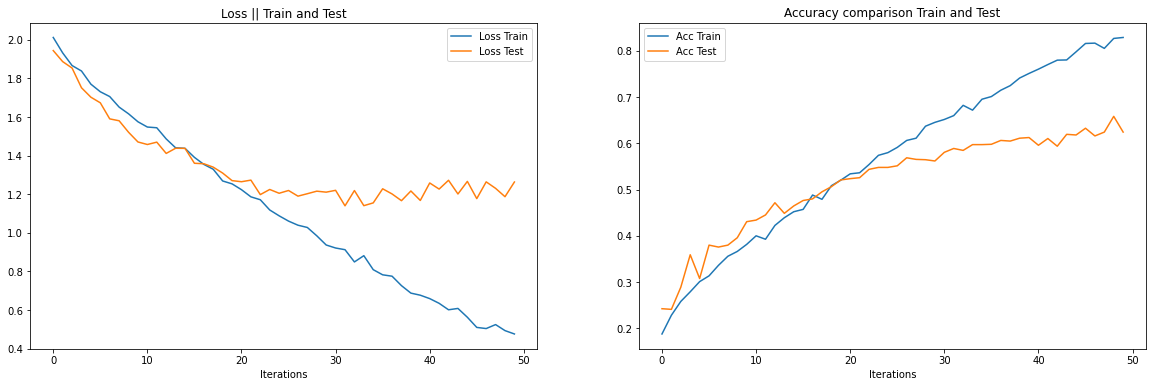

In [46]:
print("Final overall Accuracy for Test : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Loss Train')
ax[0].plot(epochs , test_loss , label = 'Loss Test')
ax[0].set_title('Loss || Train and Test')
ax[0].legend()
ax[0].set_xlabel("Iterations")

ax[1].plot(epochs , train_acc , label = 'Acc Train')
ax[1].plot(epochs , test_acc , label = 'Acc Test')
ax[1].set_title('Accuracy comparison Train and Test')
ax[1].legend()
ax[1].set_xlabel("Iterations")
plt.show()

In [47]:
# Predictions as per Test Data Samples
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [53]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()
df.head(10)

Predicted Labels Actual Labels
0            angry         angry
1             fear         angry
2              sad           sad
3          disgust       disgust
4             calm          calm
5             fear          fear
6            happy         happy
7              sad           sad
8             fear          fear
9          disgust         happy

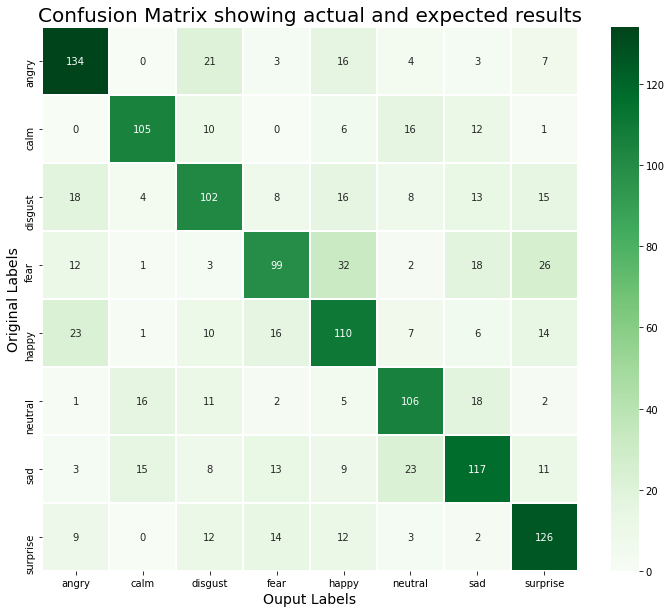

In [57]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Greens', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix showing actual and expected results', size=20)
plt.xlabel('Ouput Labels', size=14)
plt.ylabel('Original Labels', size=14)
plt.show()

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.67      0.71      0.69       188
        calm       0.74      0.70      0.72       150
     disgust       0.58      0.55      0.57       184
        fear       0.64      0.51      0.57       193
       happy       0.53      0.59      0.56       187
     neutral       0.63      0.66      0.64       161
         sad       0.62      0.59      0.60       199
    surprise       0.62      0.71      0.66       178

    accuracy                           0.62      1440
   macro avg       0.63      0.63      0.63      1440
weighted avg       0.63      0.62      0.62      1440

